# Pelota que cae
Las ecuaciones de Newton son: 
$m \frac{d^2\vec r}{dt^2} = -g \hat k + \vec f_{fricc} +\vec f_{ext}$

In [7]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

/home/sumem/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
def fuerza(v_r,t,gama=0,viento=[0,0],m=1,g=9.8):
    # v_r = [ry, rz, vy, vz]
    dvz = -g/m - (gama/m)*v_r[3] + viento[1]
    dvy = -(gama/m)*v_r[2] + viento[0]
    drz = v_r[3]
    dry = v_r[2]
    return [dry,drz,dvy,dvz]

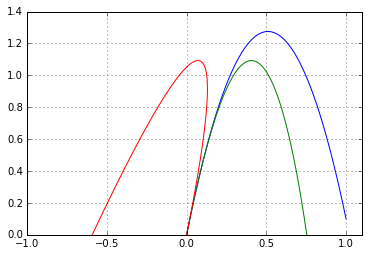

In [10]:
tiempo = linspace(0,1) # (0,1,5) el 5 es opcional solo para que despliegue 5 datos, si quiero todos lo quito.
s_ideal = odeint(fuerza,[0,0,1,5],tiempo)
y_id,z_id = s_ideal[:,0],s_ideal[:,1]
s_fric = odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,))
y_f,z_f=s_fric[:,0],s_fric[:,1]
s_f_v = odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,[-3.5,0],))
y_f_v,z_f_v = s_f_v[:,0],s_f_v[:,1]
plot(y_id,z_id,y_f,z_f,y_f_v,z_f_v)
xlim([-1,1.1]),ylim([0,1.4])
grid(True)
show()

In [67]:
def pedazo_trayectoria(pto_ini,dt=0.1,param=[0,[0,0],1,9.8]):
    tiempo = array([0,dt])
    sol = odeint(fuerza,pto_ini,tiempo,args=(param[0],param[1],param[2],param[3]))
    return sol

In [68]:
pedazo_trayectoria([0,0,1,1])

array([[ 0.   ,  0.   ,  1.   ,  1.   ],
       [ 0.1  ,  0.051,  1.   ,  0.02 ]])

In [69]:
def rebote(punto,dt,param):
    error = 1e-5
    dt = dt/2
    sol = odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
    while abs(sol[:,1][0]-sol[:,1][1]) > error:
            if sol[:,1][0]*sol[:,1][1] < 0:
                punto = sol[0]
            else:
                punto = sol[1]
            dt = dt/2
            sol = odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
            #print sol[0]
    return [sol[0][0],sol[0][1],sol[0][2],-sol[0][3]]

In [85]:
def trayectoria(pto_ini,t_fin,param=[0,[0,0],1,9.8]):
    t_total,dt=[0],0.01
    y=[pto_ini[0]]
    z=[pto_ini[1]]
    t_actual = 0
    while t_actual <= t_fin:
        t_actual = t_actual + dt
        sol = odeint(fuerza,pto_ini,[0,dt],args=(param[0],param[1],param[2],param[3],))
        if sol[:,1][0]*sol[:,1][1] < 0.:
            sol=rebote(sol[0],dt,param)
            y.append(sol[0])
            z.append(sol[1])
            pto_ini=sol
        else:
            y.append(sol[:,0][1])
            z.append(sol[:,1][1])
            pto_ini=sol[1]
    return y,z

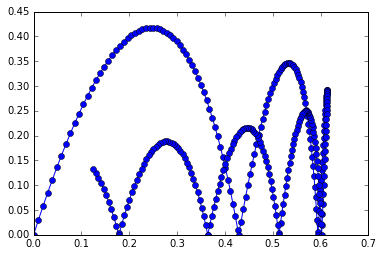

In [89]:
y,z=trayectoria([0,0,1,3],3,[0.5,[-0.5,0],1,9.8])
plot(y,z,'o-')

In [62]:
rebote([0.6,0.036,1.,-2.88],0.05,[0,[0,0],1,9.8])

[ 0.6    0.036  1.    -2.88 ]
[ 0.6    0.036  1.    -2.88 ]
[ 0.60625     0.01780859  1.         -2.94125   ]
[ 0.609375    0.00856934  1.         -2.971875  ]
[ 0.6109375   0.00391382  1.         -2.9871875 ]
[  6.11718750e-01   1.57708739e-03   1.00000000e+00  -2.99484375e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12231445e-01   4.03570457e-05   1.00000000e+00  -2.99986816e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]


[0.61224365234374989, 3.7368311003308554e-06, 1.0, 2.9999877929687497]